In [1]:
import pandas as pd
import Orange 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.size"] = 12


In [2]:
df = pd.read_csv("covid_mimic_label_f1score.csv") ## f1 scores of 42 labels for COVID-19 MIMIC-III data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   labels            42 non-null     object 
 1   % Freq            42 non-null     float64
 2   CAML (T100SG)     42 non-null     float64
 3   BiGRU (T100SG)    42 non-null     float64
 4   CNNText (T100SG)  42 non-null     float64
 5   DR-CAML (T100SG)  42 non-null     float64
 6   ECC-LR            42 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.4+ KB


In [4]:
df.head()

,labels,% Freq,CAML (T100SG),BiGRU (T100SG),CNNText (T100SG),DR-CAML (T100SG),ECC-LR
0,CAT_285,34.98,0.65,0.71,0.69,0.66,0.62
1,CAT_V58,19.74,0.66,0.68,0.64,0.67,0.52
2,CAT_996,16.11,0.55,0.42,0.50,0.55,0.39
3,CAT_496,12.12,0.72,0.71,0.71,0.71,0.37
4,CAT_287,10.95,0.59,0.55,0.54,0.58,0.29


In [5]:
df.columns

Index(['labels', '% Freq', 'CAML (T100SG)', 'BiGRU (T100SG)',
       'CNNText (T100SG)', 'DR-CAML (T100SG)', 'ECC-LR'],
      dtype='object')

In [6]:
names = ['CAML (T100SG)',
       'BiGRU (T100SG)', 'CNNText (T100SG)', 'DR-CAML (T100SG)', 'ECC-LR']

In [7]:
from scipy.stats import rankdata

In [9]:
ynew = []

for i, row in df.iterrows():
    x = row[2:] 
    print(x.values)
    y = rankdata([-1 * j for j in x])
    print(y)
    ynew.append(y)
    

[0.65 0.71 0.69 0.66 0.62]
[4. 1. 2. 3. 5.]
[0.66 0.68 0.64 0.67 0.52]
[3. 1. 4. 2. 5.]
[0.55 0.42 0.5 0.55 0.39]
[1.5 4.  3.  1.5 5. ]
[0.72 0.71 0.71 0.71 0.37]
[1. 3. 3. 3. 5.]
[0.59 0.55 0.54 0.58 0.29]
[1. 3. 4. 2. 5.]
[0.65 0.64 0.61 0.64 0.46]
[1.  2.5 4.  2.5 5. ]
[0.55 0.41 0.53 0.55 0.36]
[1.5 4.  3.  1.5 5. ]
[0.0 0.0 0.0 0.0 0.87]
[3.5 3.5 3.5 3.5 1. ]
[0.38 0.42 0.45 0.34 0.18]
[3. 2. 1. 4. 5.]
[0.41 0.32 0.41 0.4 0.3]
[1.5 4.  1.5 3.  5. ]
[0.76 0.71 0.72 0.75 0.65]
[1. 4. 3. 2. 5.]
[0.73 0.8 0.79 0.38 0.57]
[3. 1. 2. 5. 4.]
[0.32 0.2 0.29 0.32 0.24]
[1.5 5.  3.  1.5 4. ]
[0.66 0.62 0.65 0.67 0.56]
[2. 4. 3. 1. 5.]
[0.63 0.62 0.62 0.62 0.48]
[1. 3. 3. 3. 5.]
[0.55 0.31 0.55 0.56 0.27]
[2.5 4.  2.5 1.  5. ]
[0.84 0.78 0.74 0.85 0.52]
[2. 3. 4. 1. 5.]
[0.57 0.54 0.41 0.56 0.3]
[1. 3. 4. 2. 5.]
[0.42 0.33 0.28 0.42 0.3]
[1.5 3.  5.  1.5 4. ]
[0.35 0.43 0.61 0.32 0.31]
[3. 2. 1. 4. 5.]
[0.44 0.18 0.3 0.42 0.3]
[1.  5.  3.5 2.  3.5]
[0.6 0.0 0.55 0.6 0.13]
[1.5 5.  3.  1.5 4. 

In [10]:
dfR = pd.DataFrame(ynew)

In [11]:
avranks = dfR.mean(axis=0)

In [12]:
avranks

0    2.345238
1    3.511905
2    2.547619
3    2.464286
4    4.130952
dtype: float64

In [13]:
cd = Orange.evaluation.compute_CD(avranks,42,alpha="0.05",test='nemenyi')

cd= 0.9411714455347656


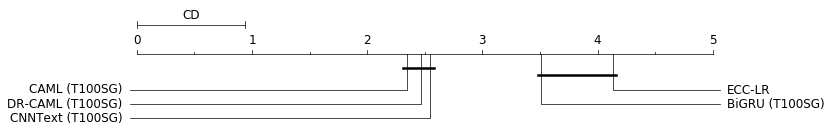

In [15]:
print("cd=",cd)
Orange.evaluation.graph_ranks(avranks, names, lowv = 0, highv=5, cd=cd, width=10)

#mpl.scale = 3
plt.show()